In [6]:
import pandas as pd
df=pd.read_csv("C:/Users/akmel/Downloads/Volve field equinor.csv",index_col = ["Dates"], parse_dates = ["Dates"])

In [8]:
df

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
Dates,,,,,,,,,,,,,,
09/01/2007,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
10/01/2007,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
11/01/2007,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
12/01/2007,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
13/01/2007,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08/01/2016,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
09/01/2016,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
10/01/2016,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


In [10]:
# dataframe 

oil_volume = pd.DataFrame (df["BORE_OIL_VOL"]).rename(columns={"BORE_OIL_VOL":"production"})
oil_volume.head()

,production
Dates,
09/01/2007,0.0
10/01/2007,0.0
11/01/2007,0.0
12/01/2007,0.0
13/01/2007,0.0


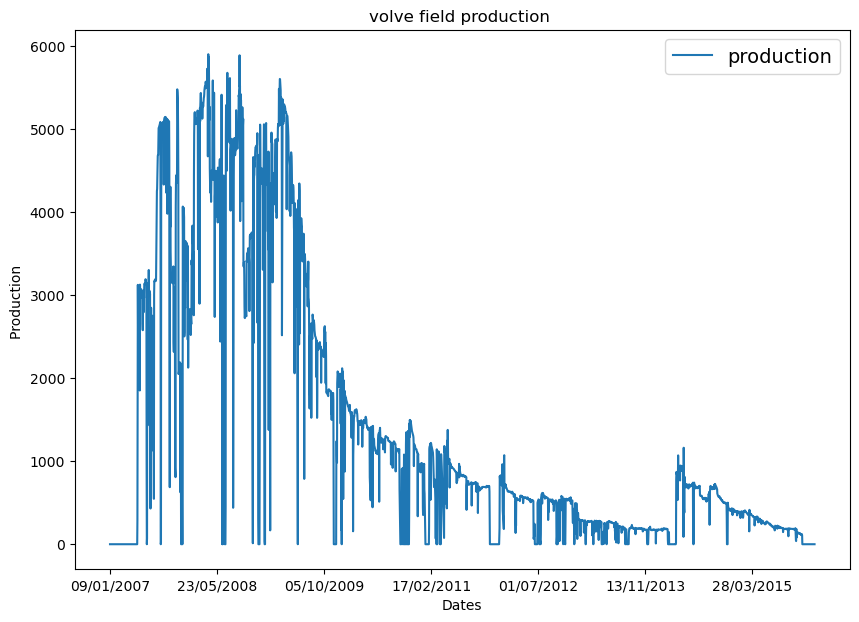

In [12]:
import matplotlib.pyplot as plt 
oil_volume.plot(figsize =(10,7))
plt.ylabel("Production ")
plt.title("volve field production ")
plt.legend(fontsize=14)

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/akmel/Downloads/Volve field equinor.csv")
df.rename(columns={df.columns[0]: "Dates"}, inplace=True)

# Convert Dates column to datetime
df["Dates"] = pd.to_datetime(df["Dates"], format="%d/%m/%Y")

# Extract features
timesteps = df["Dates"]
oil_production = df["BORE_OIL_VOL"]




In [17]:
timesteps = oil_volume.index.to_numpy()
oil_production = oil_volume["production"].to_numpy()

In [19]:
timesteps[:10] ,oil_production[:10]

(array(['09/01/2007', '10/01/2007', '11/01/2007', '12/01/2007',
        '13/01/2007', '14/01/2007', '15/01/2007', '16/01/2007',
        '17/01/2007', '18/01/2007'], dtype=object),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [21]:
split_size = int(0.8* len(oil_production))#80% train, 20% test 

x_train, y_train =timesteps[:split_size],oil_production[:split_size]

x_test, y_test  =timesteps[split_size:],oil_production[split_size:]
len(x_train ),  len(x_test), len(y_train), len(y_test)

(2632, 659, 2632, 659)

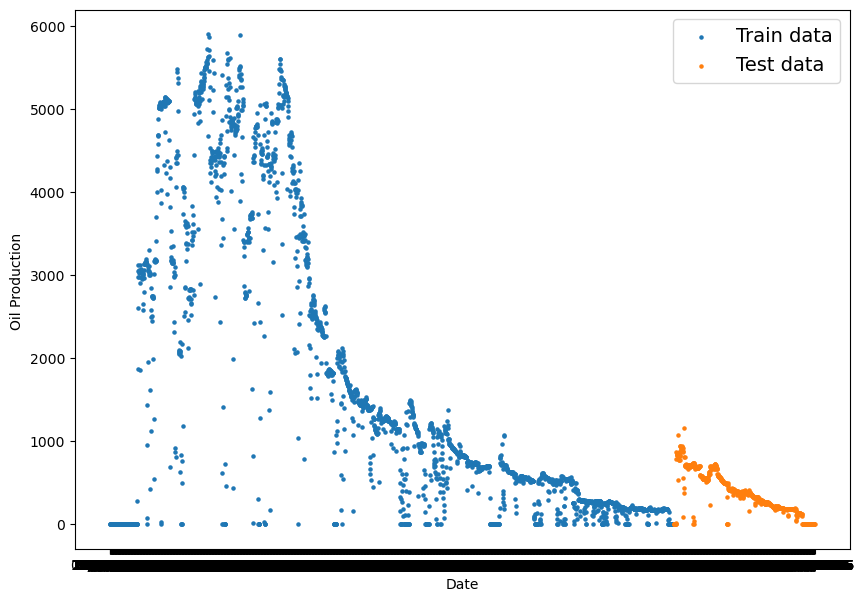

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train,s=5, label = "Train data")
plt.scatter(x_test, y_test, s=5, label = "Test data")
plt.xlabel("Date")
plt.ylabel("Oil Production ")
plt.legend(fontsize=14)
plt.show();

In [24]:
#creating a plotting function
def plot_time_series(timesteps, values, format=".",start=0, end = None, label =None):
    plt.figure(figsize=(10,7))
    plt.plot(timesteps[start:end],values[start:end],format , label=label)
    plt.xlabel("Time")
    plt.ylabel("Oil Production")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

<Figure size 1000x700 with 0 Axes>

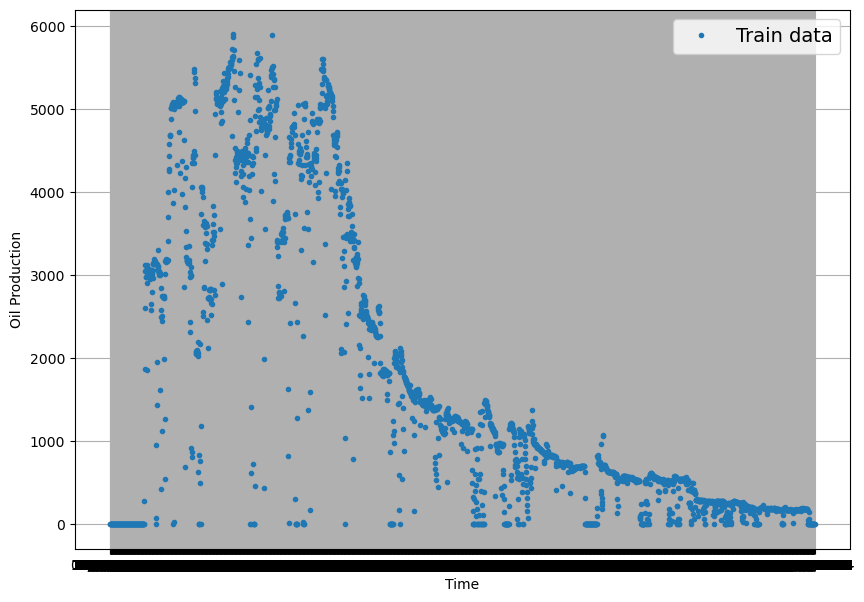

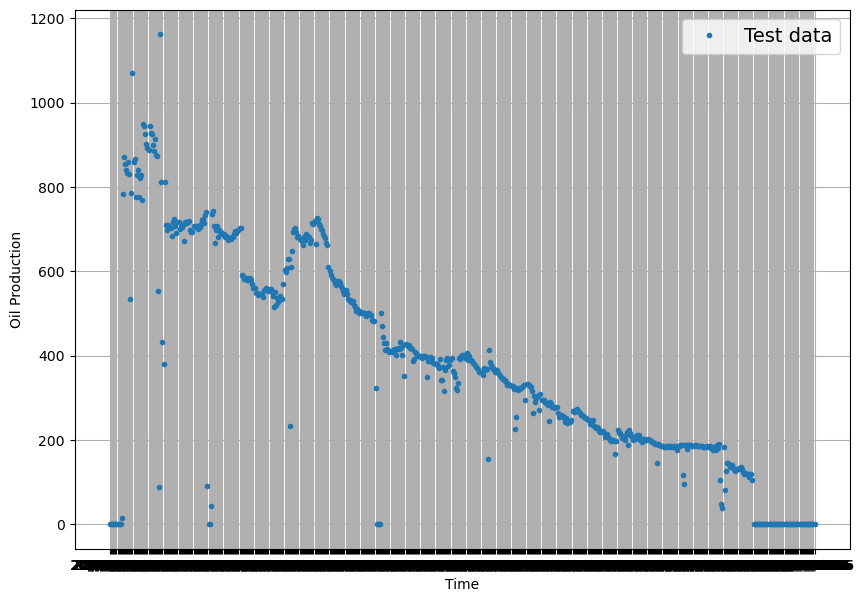

In [25]:
#Plotting function
plt.figure(figsize=(10,7))
plot_time_series(x_train, y_train, label="Train data")
plot_time_series(x_test, y_test, label="Test data")
plt.show()

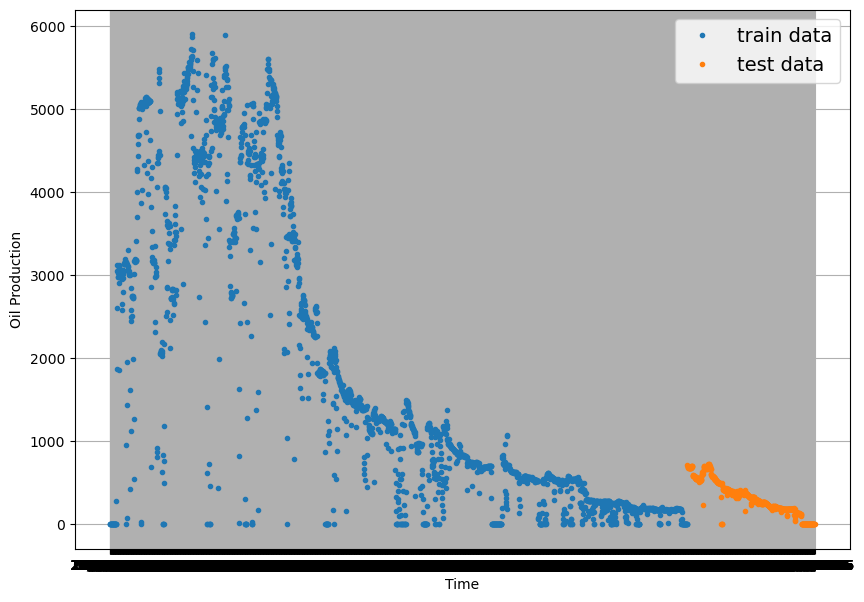

In [199]:
#creating a plotting function
def plot_time_series(timesteps, values, format=".",start=100, end = None, label =None):
  
    plt.plot(timesteps[start:end],values[start:end],format , label=label)
    plt.xlabel("Time")
    plt.ylabel("Oil Production")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    
#Plotting function
plt.figure(figsize=(10,7))
plot_time_series(x_train, y_train, label="train data")
plot_time_series(x_test, y_test, label="test data")
plt.show()

In [27]:
##Model0: Naive forecast

In [28]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

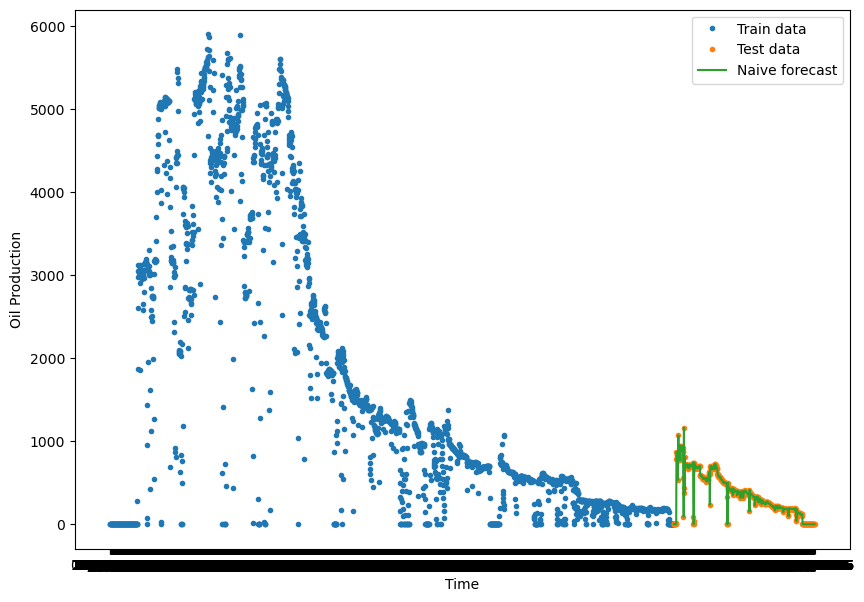

In [29]:
import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Oil Production")

###plot naive forecast 

plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", label="Naive forecast")
plt.legend()
plt.show()


In [30]:
##Evaluating a time series model

In [31]:
import tensorflow as tf

In [32]:
#MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    mae=tf.reduce_mean(tf.abs(y_true-y_pred))
    #Finding the MAE of naive forecast 
    mae_naive= tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) 
    return mae/mae_naive

In [33]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9984802431610943>

In [34]:
import tensorflow as tf
import numpy as np

def evaluate_preds(y_true, y_pred):
    # Ensure 1D arrays
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)

    # Convert to tensors for TF metrics
    y_true_tf = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred_tf = tf.convert_to_tensor(y_pred, dtype=tf.float32)

    # Standard metrics
    mae = tf.keras.metrics.MeanAbsoluteError()(y_true_tf, y_pred_tf).numpy()
    mse = tf.keras.metrics.MeanSquaredError()(y_true_tf, y_pred_tf).numpy()
    rmse = np.sqrt(mse)
    mase = mean_absolute_scaled_error(y_true_tf, y_pred_tf).numpy()  # custom function

    # SMAPE (symmetric mean absolute percentage error)
    smape = 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8)
    )

    return {
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "mase": mase,
        "smape": smape
    }


In [35]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 22.714285,
 'mse': 7254.2065,
 'rmse': 85.17163,
 'mase': 0.99848026,
 'smape': 7.2280833850498825}

In [36]:
###Part 2 Format Data /Windowing dataset 
##  window out time series dataset to turn our data into a supervised learning problem


In [37]:
len(y_train)

2632

In [53]:
print(f"we want to use :{oil_production[:7]} to predict this :{oil_production[7]}")

we want to use :[0. 0. 0. 0. 0. 0. 0.] to predict this :0.0


In [55]:
##setup variables for window and horizon size
HORIZON = 1  # Predict next 1 day 
WINDOW_SIZE = 7 # use the past week to make prediction

In [57]:
##Create function to label windowed data
def get_labelled_window(x, horizon=1):
    """
    Creates labels for windowed dataset.
    E.g. if horizon = 1
    Input:[0,1,2,3,4,5,6,7]-> Output:([0,1,2,3,4,5,6],[7])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [59]:
##Test out the window labelling function
import tensorflow as tf

test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0), horizon=1)
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [61]:
#Test out the window labelling function
import tensorflow as tf

test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))
print(f"Window :{tf.squeeze(test_window).numpy()}->Label:{tf.squeeze(test_label).numpy()}")

Window :[0 1 2 3 4 5 6]->Label:7


In [65]:
import numpy as np

# Split windows into features and labels
def get_labelled_window(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

# Make multiple windows
def make_windows(x, window_size=7, horizon=1):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size.
    Example: x = [1,2,3,4,5,6,7,8], window_size=7, horizon=1
    -> windows=[[1,2,3,4,5,6,7]], labels=[[8]]
    """
    #  Create a window step (base index)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    print(f"Window step:\n{window_step}")

    #  Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(
        np.arange(len(x)-(window_size+horizon-1)), axis=0
    ).T
    print(f"Window indexes:\n first 3={window_indexes[:3]}, last 3={window_indexes[-3:]}, shape={window_indexes.shape}")

    #  Index into x with 2D array of window steps
    windowed_array = x[window_indexes]

    #  Split into windows and labels
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)

    return windows, labels


In [69]:
full_windows, full_labels = make_windows(oil_production, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
[[0 1 2 3 4 5 6 7]]
Window indexes:
 first 3=[[0 1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7 8]
 [2 3 4 5 6 7 8 9]], last 3=[[3281 3282 3283 3284 3285 3286 3287 3288]
 [3282 3283 3284 3285 3286 3287 3288 3289]
 [3283 3284 3285 3286 3287 3288 3289 3290]], shape=(3284, 8)


(3284, 3284)

In [71]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [0. 0. 0. 0. 0. 0. 0.] -> Label: [0.]
Window: [0. 0. 0. 0. 0. 0. 0.] -> Label: [0.]
Window: [0. 0. 0. 0. 0. 0. 0.] -> Label: [0.]


In [73]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [0. 0. 0. 0. 0. 0. 0.] -> Label: [0.]
Window: [0. 0. 0. 0. 0. 0. 0.] -> Label: [0.]
Window: [0. 0. 0. 0. 0. 0. 0.] -> Label: [0.]


In [75]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [77]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2627, 657, 2627, 657)

In [79]:
train_windows[:5], train_labels[:5]

(array([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [81]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [83]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + ".keras"), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [85]:
#Model 1: Dense model (window = 7, horizon = 1)

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 787.7409 - mae: 787.7409 - val_loss: 83.0115 - val_mae: 83.0115
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 307.1623 - mae: 307.1623 - val_loss: 39.1847 - val_mae: 39.1847
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 230.7509 - mae: 230.7509 - val_loss: 28.8042 - val_mae: 28.8042
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 210.4521 - mae: 210.4521 - val_loss: 27.2557 - val_mae: 27.2557
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 200.7427 - mae: 200.7427 - val_loss: 26.6016 - val_mae: 26.6016
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 195.1368 - mae: 195.1368 - val_loss: 27.3251 - val_mae: 27.3251
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 190.0128 - mae: 190.0128 - val_loss: 25.6710 - val_mae: 25.6710
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 186.3796 - mae: 186.3796 - val_loss: 24.8134 - val_mae: 24.8134
Epoch 9/100
2

In [87]:
##Making forecasts with a model (on the test dataset)
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [89]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(657,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.00022569, 0.00022569, 0.00022569, 0.00022569, 0.00022569,
        0.00022569, 0.00022569, 0.00022569, 0.00022569, 0.00022569],
       dtype=float32)>)

In [91]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)

model_1_results

{'mae': 23.617481,
 'mse': 7030.3,
 'rmse': 83.846886,
 'mase': 1.036603,
 'smape': 28.540313151498502}

In [93]:
naive_results

{'mae': 22.714285,
 'mse': 7254.2065,
 'rmse': 85.17163,
 'mase': 0.99848026,
 'smape': 7.2280833850498825}

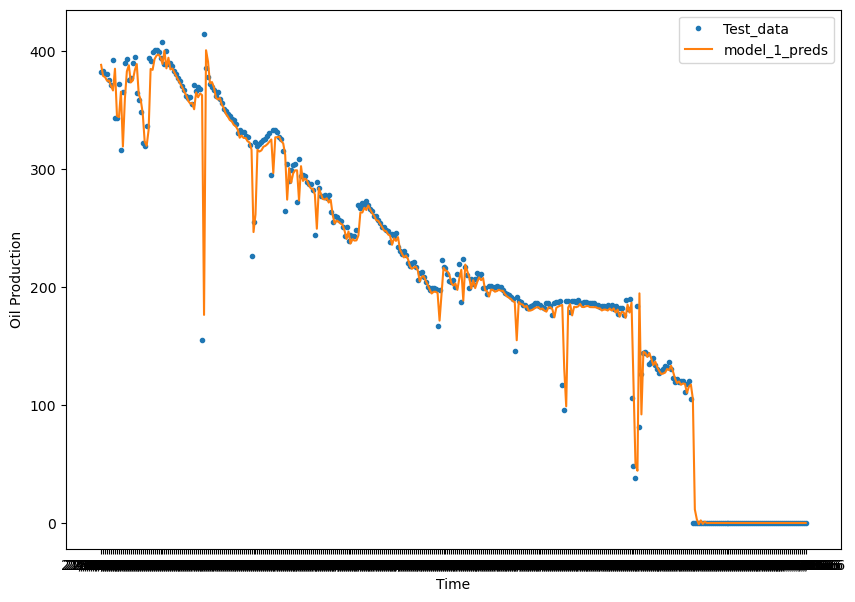

In [95]:
offset = 300
plt.figure(figsize=(10, 7))

# Plot test data
plot_time_series(
    timesteps=x_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test_data"
)

# Plot model predictions 
plot_time_series(
    timesteps=x_test[-len(test_windows):],
    values=model_1_preds,
    start=offset,
    format="-",
    label="model_1_preds"
)

plt.legend()
plt.show()


In [97]:
##Model 2: Dense (window = 30, horizon = 1)
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past
     


In [101]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(oil_production, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]
Window indexes:
 first 3=[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  25 26 27 28 29 30 31]
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
  26 27 28 29 30 31 32]], last 3=[[3258 3259 3260 3261 3262 3263 3264 3265 3266 3267 3268 3269 3270 3271
  3272 3273 3274 3275 3276 3277 3278 3279 3280 3281 3282 3283 3284 3285
  3286 3287 3288]
 [3259 3260 3261 3262 3263 3264 3265 3266 3267 3268 3269 3270 3271 3272
  3273 3274 3275 3276 3277 3278 3279 3280 3281 3282 3283 3284 3285 3286
  3287 3288 3289]
 [3260 3261 3262 3263 3264 3265 3266 3267 3268 3269 3270 3271 3272 3273
  3274 3275 3276 3277 3278 3279 3280 3281 3282 3283 3284 3285 3286 3287
  3288 3289 3290]], shape=(3261, 31)


(3261, 3261)

In [103]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2608, 653, 2608, 653)

In [105]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [107]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.2627 


25.262733459472656

In [110]:
from keras.models import load_model

model_2 = load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.3100  


24.309953689575195

In [112]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
     

# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


{'mae': 24.309954,
 'mse': 6947.8223,
 'rmse': 83.3536,
 'mase': 1.0604904,
 'smape': 27.363462322926424}

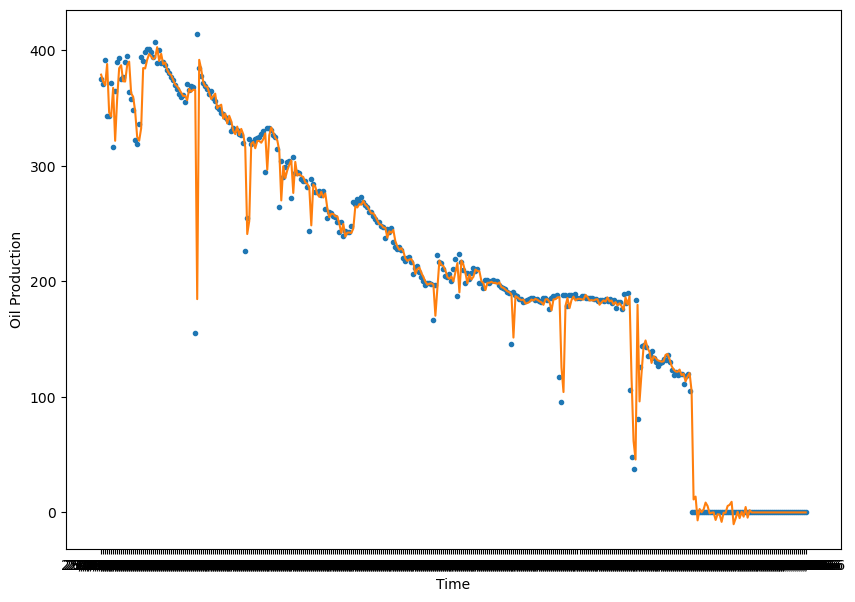

In [114]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

In [116]:
##Model 3: Dense (window = 30, horizon = 7)
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(oil_production, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
Window indexes:
 first 3=[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  25 26 27 28 29 30 31 32 33 34 35 36 37]
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
  26 27 28 29 30 31 32 33 34 35 36 37 38]], last 3=[[3252 3253 3254 3255 3256 3257 3258 3259 3260 3261 3262 3263 3264 3265
  3266 3267 3268 3269 3270 3271 3272 3273 3274 3275 3276 3277 3278 3279
  3280 3281 3282 3283 3284 3285 3286 3287 3288]
 [3253 3254 3255 3256 3257 3258 3259 3260 3261 3262 3263 3264 3265 3266
  3267 3268 3269 3270 3271 3272 3273 3274 3275 3276 3277 3278 3279 3280
  3281 3282 3283 3284 3285 3286 3287 3288 3289]
 [3254 3255 3256 3257 3258 3259 3260 3261 3262 3263 3264 3265 3266 3267
  3268 3269 3270 3271 3272 3273 

(3255, 3255)

In [118]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_label)

(2604, 651, 2604, 1)

In [120]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [122]:
#  model evaluation  with a larger window size and horizon ?
model_3.evaluate(test_windows, test_labels)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.9633


40.963260650634766

In [124]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.5773   


40.577266693115234

In [126]:
# The predictions are going to be 7 steps at a time (as this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]
     

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[-12.8366375,  41.363384 ,  38.00326  ,  45.654583 ,  19.138754 ,
         -4.628325 ,  10.190552 ],
       [  4.0606117,  31.39534  ,  41.046898 ,  70.91453  ,  45.747585 ,
         41.410988 ,  57.963646 ],
       [ 31.716436 ,  36.878437 ,   6.0253153,  -7.5019164,  24.974874 ,
         26.75114  ,  19.413406 ],
       [ 24.108109 ,  20.847805 , -18.896235 , -14.387574 ,  -2.1009352,
         30.17426  ,  11.689491 ],
       [-10.372149 ,   0.1648263,   9.573958 ,  -3.8547416,  19.297003 ,
         40.055073 ,  39.10245  ]], dtype=float32)>

In [130]:
# Calculate model_3 results .
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)

model_3_results

{'mae': 40.577263,
 'mse': 12374.735,
 'rmse': 111.24179,
 'mase': 1.5215387,
 'smape': 28.782514031517152}

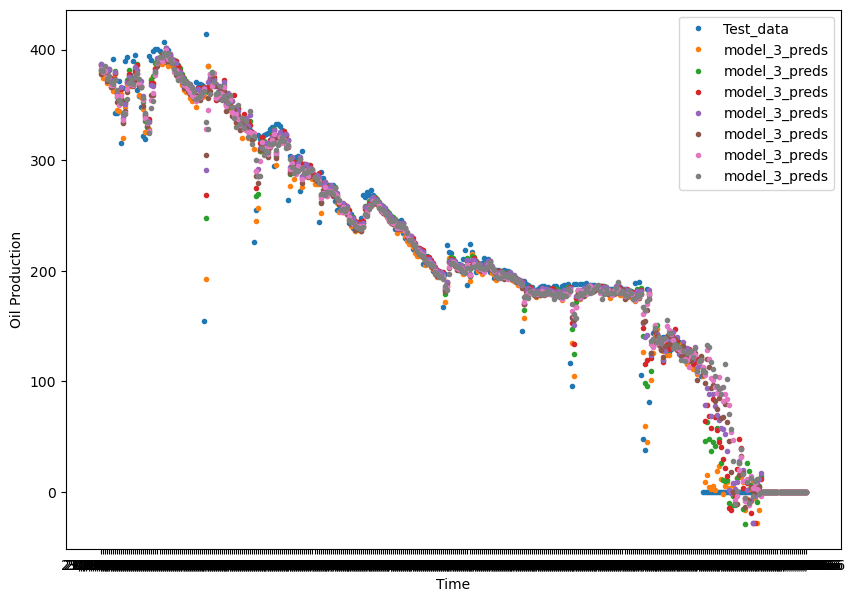

In [144]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")
plt.legend()
plt.show()

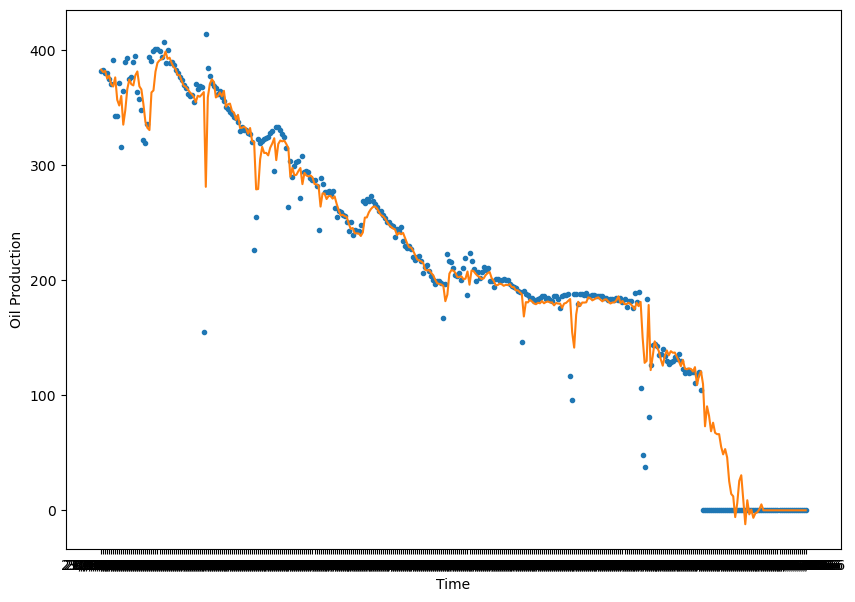

In [148]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=x_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

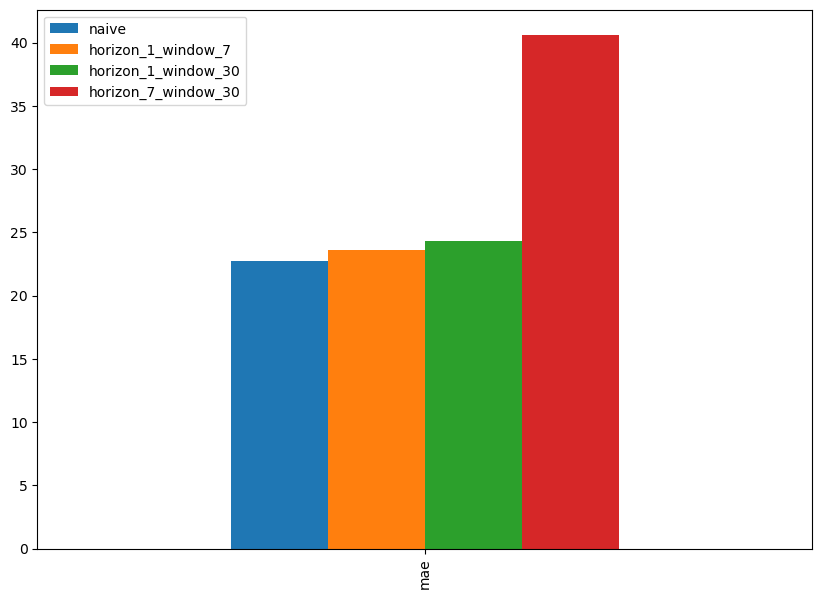

In [152]:

df = pd.DataFrame({
    "naive": [naive_results["mae"]],
    "horizon_1_window_7": [model_1_results["mae"].mean()],
    "horizon_1_window_30": [model_2_results["mae"].mean()],
    "horizon_7_window_30": [model_3_results["mae"].mean()]}, index=["mae"]).plot(figsize=(10, 7), kind="bar", legend=True)

In [154]:
##Model 4: Conv1D

HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data
     

In [158]:
# Create windowed dataset
full_windows, full_labels = make_windows(oil_production, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
[[0 1 2 3 4 5 6 7]]
Window indexes:
 first 3=[[0 1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7 8]
 [2 3 4 5 6 7 8 9]], last 3=[[3281 3282 3283 3284 3285 3286 3287 3288]
 [3282 3283 3284 3285 3286 3287 3288 3289]
 [3283 3284 3285 3286 3287 3288 3289 3290]], shape=(3284, 8)


(3284, 3284)

In [160]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2627, 657, 2627, 657)

In [163]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [167]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [169]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [171]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)